# Data Analysis

### SEN9120: Advanced Agent Based Modeling
Cruz Torres Francesco, 4999959
<br> Herzog Rico, 5095530

In [1]:
# Import necessary scintific computing, data analysis and visualization packages
%matplotlib inline
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

In [2]:
for name in sorted(os.listdir("./results")):
    print(name)

outcomes2021-2-14-8-53_300 samples.csv
outcomes2021-2-6-20-18.csv
outcomes2021-2-6-21-00.csv
outcomes2021-2-7-0-32_50 samples.csv
outcomes2021-2-9-3-42_150 samples.csv
outcomes2021-2-9-7-27_150 samples.csv
parameters2021-2-14-8-53_300 samples.csv
parameters2021-2-6-20-18.csv
parameters2021-2-6-21-00.csv
parameters2021-2-7-0-32_50 samples.csv
parameters2021-2-9-3-42_150 samples.csv
parameters2021-2-9-7-27_150 samples.csv


In [15]:
#access all results files and store them in dataframes

count_outcomes = 1
count_parameters = 1

for name in sorted(os.listdir("./results")):
    path = os.path.join("./results", name)
        
    if "outcomes" in name:
        globals()["outcomes_"+str(count_outcomes)] = pd.read_csv(path)
        count_outcomes += 1
        
    #othwerwise the filename starts with "parameters"
    else:
        globals()["parameters_"+str(count_parameters)] = pd.read_csv(path)
        count_parameters += 1

In [16]:
# for each couple of files (parameters ; outcome) merge the two files together
for i,j in zip(range(1,count_parameters), range(1,count_outcomes)):
    globals()["results_"+str(i)] = pd.merge(globals()["parameters_"+str(i)], globals()["outcomes_"+str(i)], left_on= "Unnamed: 0", right_on= "Run").drop("Unnamed: 0", axis=1)

In [17]:
# adjust the "Run" column such that each run is unique across all results files
results_2["Run"] = results_2["Run"] + results_1["Run"].iloc[-1] + 1
results_3["Run"] = results_3["Run"] + results_2["Run"].iloc[-1] + 1
results_4["Run"] = results_4["Run"] + results_3["Run"].iloc[-1] + 1
results_5["Run"] = results_5["Run"] + results_4["Run"].iloc[-1] + 1
results_6["Run"] = results_6["Run"] + results_5["Run"].iloc[-1] + 1
results_6["Run"]

0        520
1        520
2        520
3        520
4        520
        ... 
14995    669
14996    669
14997    669
14998    669
14999    669
Name: Run, Length: 15000, dtype: int64

In [18]:
# combine all results dataframes into one dataframe, where Run is the unique key column
results = pd.concat([results_1, results_2, results_3, results_4, results_5, results_6], axis = 0)
results["MW_Total"] = results.iloc[:, -3:].sum(axis=1)
results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Run,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
0,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,0,15.0,45.0,16.5,76.5
1,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,1,10.0,15.0,27.0,52.0
2,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,2,15.0,29.0,19.5,63.5
3,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,3,10.0,0.0,25.5,35.5
4,18.0,2.0,21.0,-1.0,-3.0,13.0,True,0,4,10.0,45.0,13.5,68.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,20.0,7.0,-2.0,2.0,18.0,True,669,95,100.0,521.0,448.5,1069.5
14996,2.0,20.0,7.0,-2.0,2.0,18.0,True,669,96,130.0,477.0,420.0,1027.0
14997,2.0,20.0,7.0,-2.0,2.0,18.0,True,669,97,144.0,464.0,391.5,999.5
14998,2.0,20.0,7.0,-2.0,2.0,18.0,True,669,98,130.0,444.0,429.0,1003.0


## Exploration of Variety 
How much does the random seed affect the outcomes of any given lever space combination?

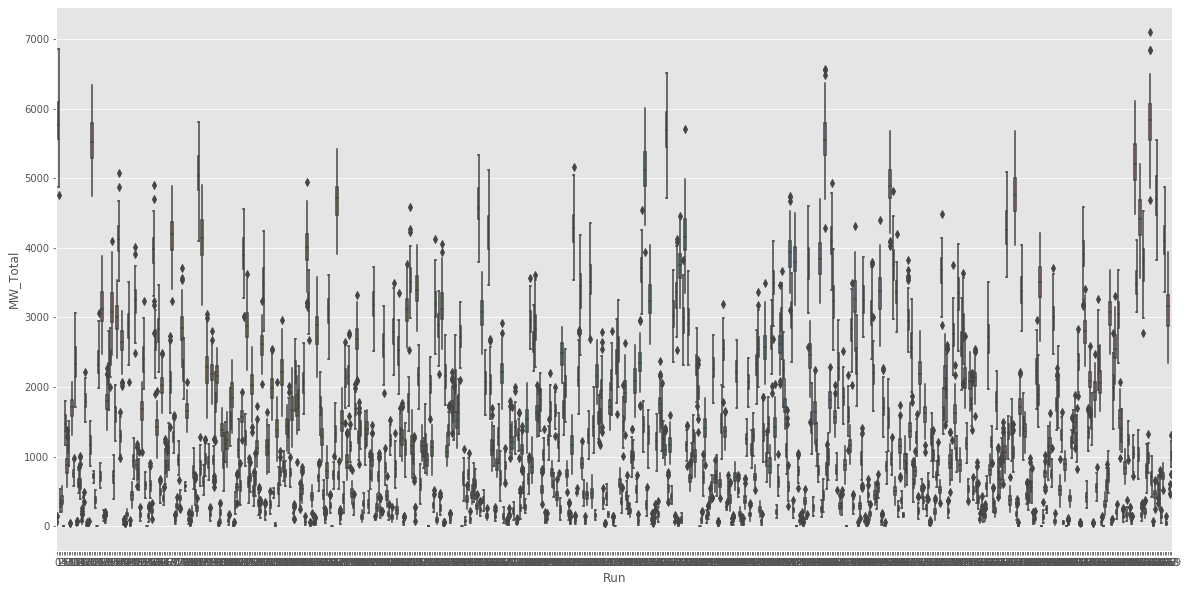

In [19]:
fig = sns.boxplot(x = results["Run"], y = results["MW_Total"])
fig.figure.set_size_inches(20, 10)

In [20]:
# save figure
fig = fig.get_figure()
fig.savefig("./Graphs/Oucome_variance.png") 

## Exploration of the Lever and Uncertainty space
These pair plot shows how the combinations of various parameters affect the outcome on terms of total MW installed in the MRDH. 

In [146]:
xl_space = results.groupby("Run").mean()
xl_space["MW_Total"] = lever_space.iloc[:, -3:].sum(axis=1)
xl_space

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
0,8.0,8.0,15.0,1.0,4.0,1.0,True,49.5,54.25,231.13,157.725,831.96
1,15.0,15.0,14.0,-4.0,-2.0,11.0,False,49.5,158.65,728.00,327.900,2270.45
2,19.0,5.0,20.0,-1.0,-4.0,14.0,False,49.5,31.22,131.17,74.280,442.12
3,7.0,25.0,3.0,2.0,-2.0,15.0,False,49.5,330.16,1484.64,656.100,4611.64
4,4.0,18.0,11.0,5.0,4.0,22.0,False,49.5,223.61,1005.85,458.355,3152.02
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,14.0,4.0,2.0,-1.0,21.0,False,49.5,102.53,404.84,285.870,1483.95
216,3.0,18.0,22.0,3.0,-4.0,6.0,True,49.5,170.60,687.84,418.350,2382.98
217,25.0,5.0,6.0,-3.0,1.0,2.0,False,49.5,27.63,117.26,74.520,411.19


In [147]:
sns.pairplot(xl_space.iloc[:,[0,1,2,3,4,5,6,-1]], hue="MW_Total", height=3)

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must hav

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DDADCF59D8> (for post_execute):


KeyboardInterrupt: 

## Explore which levers lead to the best outcomes
We take the minimum value across all random seeds as the measure for the best outcome and select the Top 10% of all the scenarios.

In [207]:
best_cases = results.groupby("Run").min()
best_cases = best_cases[best_cases["MW_Total"] > best_cases["MW_Total"].quantile(0.9)]
best_cases

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
10,19.0,23.0,14.0,1.0,-5.0,23.0,True,0,484.0,2164.0,636.0,3541.5
20,23.0,22.0,8.0,-5.0,-5.0,24.0,True,0,350.0,1628.0,544.5,2694.0
51,13.0,23.0,18.0,4.0,4.0,15.0,False,0,370.0,1939.0,625.5,3051.0
53,19.0,24.0,13.0,2.0,-3.0,19.0,True,0,602.0,2535.0,742.5,3945.5
56,24.0,18.0,9.0,1.0,-2.0,12.0,False,0,303.0,1556.0,483.0,2615.5
66,22.0,24.0,11.0,5.0,-1.0,11.0,False,0,760.0,2942.0,765.0,4712.0
72,21.0,18.0,24.0,1.0,1.0,20.0,True,0,377.0,1548.0,490.5,2536.5
74,16.0,24.0,4.0,-2.0,5.0,19.0,True,0,365.0,1865.0,642.0,3135.5
77,20.0,24.0,24.0,0.0,-3.0,18.0,False,0,425.0,2173.0,667.5,3356.5


# PRIM Algorithm

In [8]:
# Imports
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

C:\Users\frac1\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning:

ipyparallel not installed - IpyparalleEvaluator not available



In [9]:
prim_results = results.groupby(["Run"]).mean()
#prim_results.rename(columns={"administrative-network-meetings":"administrative network meetings"}, inplace=True)
prim_results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
0,18.0,2.0,21.0,-1.0,-3.0,13.0,True,49.5,7.43,27.62,21.030,56.080
1,23.0,24.0,23.0,5.0,-3.0,10.0,False,49.5,1028.93,3884.00,867.645,5780.575
2,9.0,6.0,7.0,0.0,4.0,17.0,True,49.5,43.59,185.12,105.480,334.190
3,19.0,6.0,8.0,0.0,-4.0,21.0,False,49.5,50.17,210.28,111.240,371.690
4,8.0,0.0,17.0,5.0,-1.0,4.0,True,49.5,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
665,23.0,24.0,20.0,-4.0,0.0,7.0,True,49.5,637.82,2746.53,738.015,4122.365
666,17.0,2.0,25.0,-5.0,4.0,16.0,True,49.5,5.49,23.13,19.410,48.030
667,19.0,21.0,22.0,-1.0,0.0,21.0,False,49.5,458.18,2075.16,586.725,3120.065


In [10]:
x = prim_results.iloc[:,:7]
y = prim_results.iloc[:, -1] > results.iloc[:, -1].quantile(0.75)
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] 670 points remaining, containing 169 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1417910447761194, coverage: 0.5621301775147929, density: 1.0 restricted_dimensions: 4


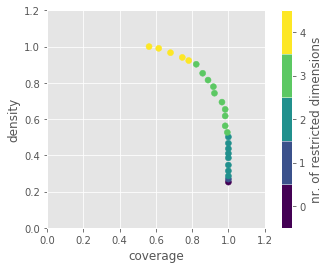

In [11]:
box1.show_tradeoff()
plt.show()

In [12]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.252239,0,1.000000,0.252239,0
1,1.000000,0.268680,1,0.938806,0.268680,1
2,1.000000,0.285956,2,0.882090,0.285956,2
3,1.000000,0.314126,3,0.802985,0.314126,2
4,1.000000,0.346311,4,0.728358,0.346311,2
5,1.000000,0.385845,5,0.653731,0.385845,2
6,1.000000,0.410194,6,0.614925,0.410194,2
7,1.000000,0.436693,7,0.577612,0.436693,2
8,1.000000,0.466851,8,0.540299,0.466851,2
9,1.000000,0.501484,9,0.502985,0.501484,2


coverage    0.822485
density     0.902597
id                19
mass        0.229851
mean        0.902597
res_dim            3
Name: 19, dtype: object

                                 box 19                                      
                                    min   max                       qp values
total-project-proposal-frequency   15.5  25.0  [4.3508852849290204e-38, -1.0]
administrative-network-meetings     9.5  25.0   [3.864359095579756e-15, -1.0]
max-project-capacity                1.5  25.0     [0.04888709548928949, -1.0]



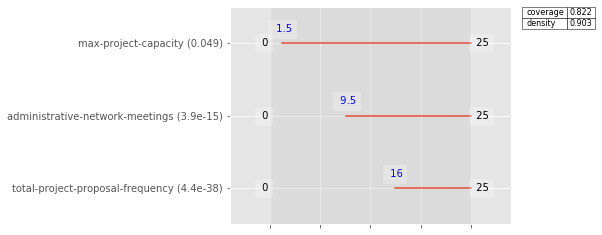

In [13]:
box1.inspect(19);
box1.inspect(19, style='graph')
plt.savefig("./Graphs/Prim_constraints_670_samples")
plt.show()

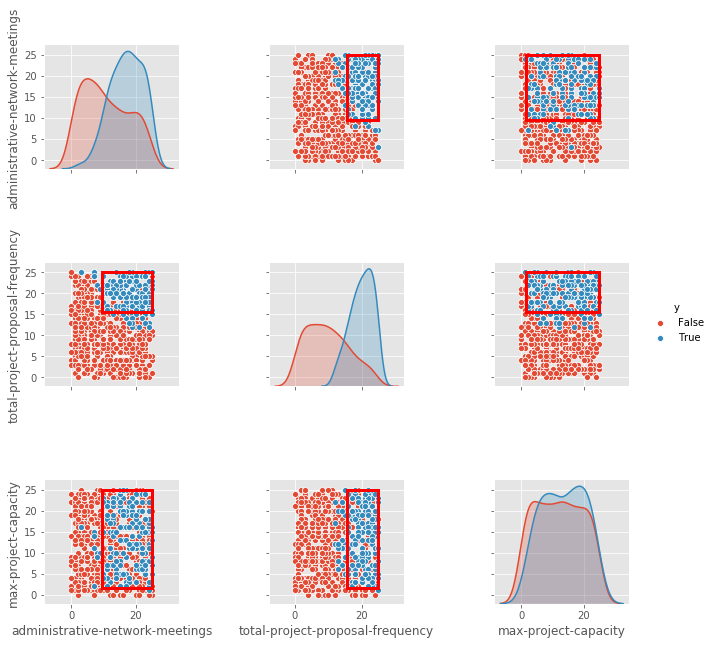

In [21]:
box1.show_pairs_scatter(19).fig.set_size_inches(10,9)
plt.savefig("./Graphs/Prim_Scenario_Discovery_670_samples")
plt.show(19)